## The forecasting model: Facebook’s Prophet
The most commonly used models for forecasting predictions are the autoregressive models. Briefly, the autoregressive model specifies that the output variable depends linearly on its own previous values and on a stochastic term (an imperfectly predictable term).

Recently, in an attempt to develop a model that could capture seasonality in time-series data, Facebook developed the famous Prophet model that is publicly available for everyone. We will use this state-of-the-art model: the Prophet model. Prophet is able to capture daily, weekly and yearly seasonality along with holiday effects, by implementing additive regression models.
The mathematical equation behind the Prophet model is defined as:

**y(t) = g(t) + s(t) + h(t) + e(t)**

with, g(t) representing the trend. Prophet uses a piecewise linear model for trend forecasting.

s(t) represents periodic changes (weekly, monthly, yearly).

h(t) represents the effects of holidays (recall: Holidays impact businesses).

e(t) is the error term.

The Prophet model fitting procedure is usually very fast (even for thousands of observations) and it does not require any data pre-processing. It deals also with missing data and outliers.

# Microsoft

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import yfinance as yf

In [2]:
msft = yf.Ticker("MSFT")
data = msft.history(period="40y")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1986-03-13 00:00:00-05:00,0.054693,0.062736,0.054693,0.060055,1031788800,0.0,0.0
1986-03-14 00:00:00-05:00,0.060055,0.063272,0.060055,0.062199,308160000,0.0,0.0
1986-03-17 00:00:00-05:00,0.062199,0.063808,0.062199,0.063272,133171200,0.0,0.0
1986-03-18 00:00:00-05:00,0.063272,0.063808,0.061127,0.061663,67766400,0.0,0.0
1986-03-19 00:00:00-05:00,0.061663,0.062199,0.060055,0.060591,47894400,0.0,0.0


In [3]:
data = data.reset_index()[["Date","Close"]]
data.head()

,Date,Close
0,1986-03-13 00:00:00-05:00,0.060055
1,1986-03-14 00:00:00-05:00,0.062199
2,1986-03-17 00:00:00-05:00,0.063272
3,1986-03-18 00:00:00-05:00,0.061663
4,1986-03-19 00:00:00-05:00,0.060591


In [4]:
data["Date"] = data["Date"].dt.date
data.head()

,Date,Close
0,1986-03-13,0.060055
1,1986-03-14,0.062199
2,1986-03-17,0.063272
3,1986-03-18,0.061663
4,1986-03-19,0.060591


In [5]:
data.describe()

,Close
count,9622.000000
mean,50.806970
std,86.039441
min,0.055765
25%,3.493895
50%,19.137014
75%,37.553299
max,428.596924


In [6]:
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head()

,ds,y
0,1986-03-13,0.060055
1,1986-03-14,0.062199
2,1986-03-17,0.063272
3,1986-03-18,0.061663
4,1986-03-19,0.060591


In [7]:
!pip install prophet

In [8]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0arsv3vn/5999bire.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0arsv3vn/t8p8j7mc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5997', 'data', 'file=/tmp/tmp0arsv3vn/5999bire.json', 'init=/tmp/tmp0arsv3vn/t8p8j7mc.json', 'output', 'file=/tmp/tmp0arsv3vn/prophet_modelp_b861g_/prophet_model-20240516150711.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:07:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:07:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


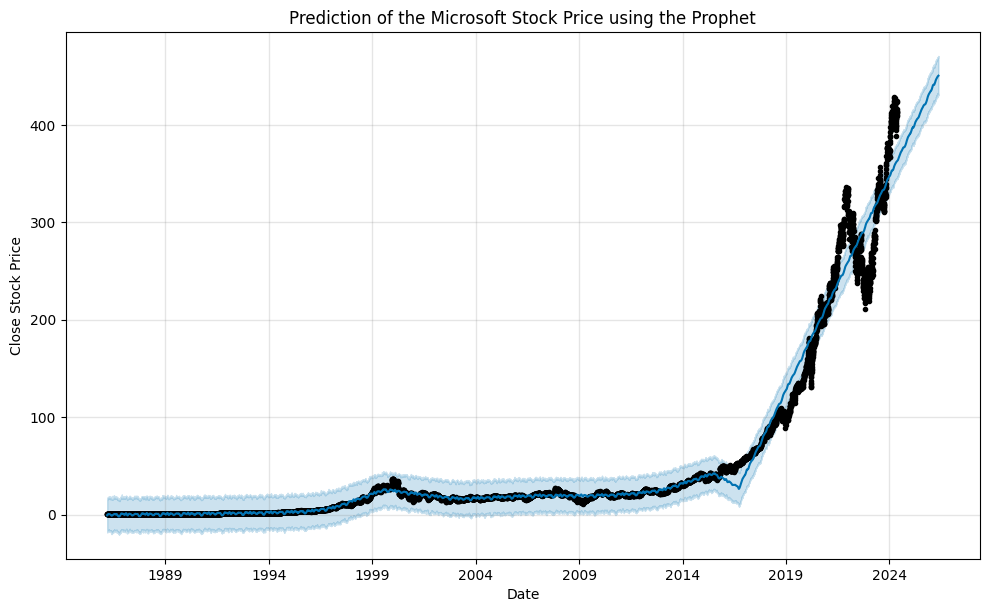

In [9]:
future = m.make_future_dataframe(periods=365*2) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Microsoft Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

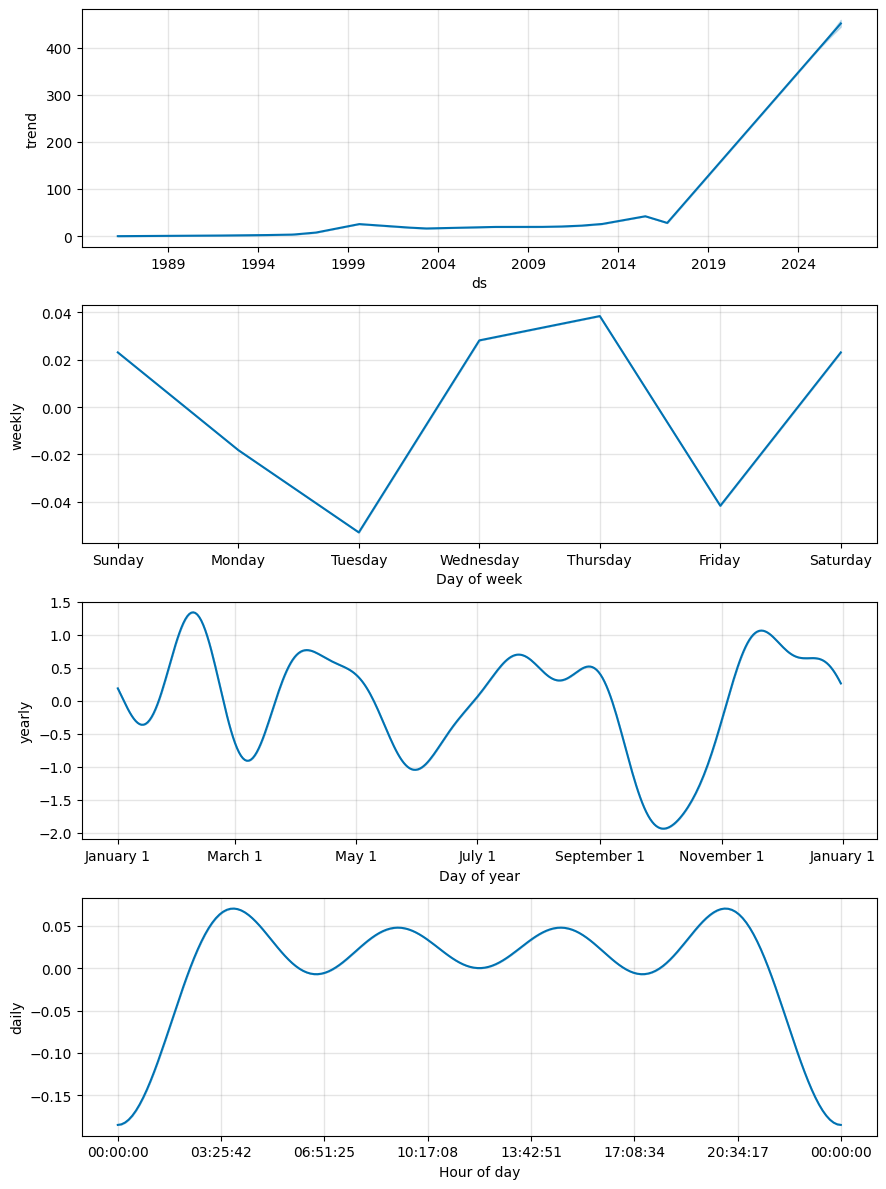

In [10]:
m.plot_components(prediction)
plt.show()

In [11]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1986-03-13,0.014487,-16.449866,16.194176,0.014487,0.014487,-0.881063,-0.881063,-0.881063,-0.184838,...,0.038453,0.038453,0.038453,-0.734677,-0.734677,-0.734677,0.0,0.0,0.0,-0.866576
1,1986-03-14,0.015012,-18.498248,15.841041,0.015012,0.015012,-0.895200,-0.895200,-0.895200,-0.184838,...,-0.041700,-0.041700,-0.041700,-0.668662,-0.668662,-0.668662,0.0,0.0,0.0,-0.880188
2,1986-03-17,0.016589,-17.070981,15.886307,0.016589,0.016589,-0.631917,-0.631917,-0.631917,-0.184838,...,-0.018183,-0.018183,-0.018183,-0.428895,-0.428895,-0.428895,0.0,0.0,0.0,-0.615327
3,1986-03-18,0.017115,-17.588109,15.442420,0.017115,0.017115,-0.577219,-0.577219,-0.577219,-0.184838,...,-0.052956,-0.052956,-0.052956,-0.339424,-0.339424,-0.339424,0.0,0.0,0.0,-0.560104
4,1986-03-19,0.017640,-16.931298,16.436173,0.017640,0.017640,-0.404076,-0.404076,-0.404076,-0.184838,...,0.028176,0.028176,0.028176,-0.247414,-0.247414,-0.247414,0.0,0.0,0.0,-0.386436


In [12]:
filtered_df = prediction[prediction['ds'] == '2025-12-31']

# Stock price at end of 2025.
print(filtered_df.iloc[0].trend)

434.6095592962495


# Cisco

In [13]:
csco = yf.Ticker("CSCO")
data = csco.history(period="40y")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1990-02-16 00:00:00-05:00,0.0,0.054158,0.050037,0.052392,940636800,0.0,0.0
1990-02-20 00:00:00-05:00,0.0,0.054158,0.050626,0.054158,151862400,0.0,0.0
1990-02-21 00:00:00-05:00,0.0,0.053569,0.051215,0.052980,70531200,0.0,0.0
1990-02-22 00:00:00-05:00,0.0,0.055335,0.053569,0.053569,45216000,0.0,0.0
1990-02-23 00:00:00-05:00,0.0,0.054158,0.052980,0.053275,44697600,0.0,0.0


In [14]:
data = data.reset_index()[["Date","Close"]]
data.head()

,Date,Close
0,1990-02-16 00:00:00-05:00,0.052392
1,1990-02-20 00:00:00-05:00,0.054158
2,1990-02-21 00:00:00-05:00,0.052980
3,1990-02-22 00:00:00-05:00,0.053569
4,1990-02-23 00:00:00-05:00,0.053275


In [15]:
data["Date"] = data["Date"].dt.date
data.head()

,Date,Close
0,1990-02-16,0.052392
1,1990-02-20,0.054158
2,1990-02-21,0.052980
3,1990-02-22,0.053569
4,1990-02-23,0.053275


In [16]:
data.describe()

,Close
count,8627.000000
mean,18.629859
std,15.068826
min,0.048271
25%,8.737955
50%,14.858247
75%,24.855716
max,59.220722


In [17]:
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head()

,ds,y
0,1990-02-16,0.052392
1,1990-02-20,0.054158
2,1990-02-21,0.052980
3,1990-02-22,0.053569
4,1990-02-23,0.053275


In [18]:
data.describe()

,y
count,8627.000000
mean,18.629859
std,15.068826
min,0.048271
25%,8.737955
50%,14.858247
75%,24.855716
max,59.220722


In [19]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0arsv3vn/j57qfjjd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0arsv3vn/fvlk973j.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=67051', 'data', 'file=/tmp/tmp0arsv3vn/j57qfjjd.json', 'init=/tmp/tmp0arsv3vn/fvlk973j.json', 'output', 'file=/tmp/tmp0arsv3vn/prophet_modelh8vspu18/prophet_model-20240516150735.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:07:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:07:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


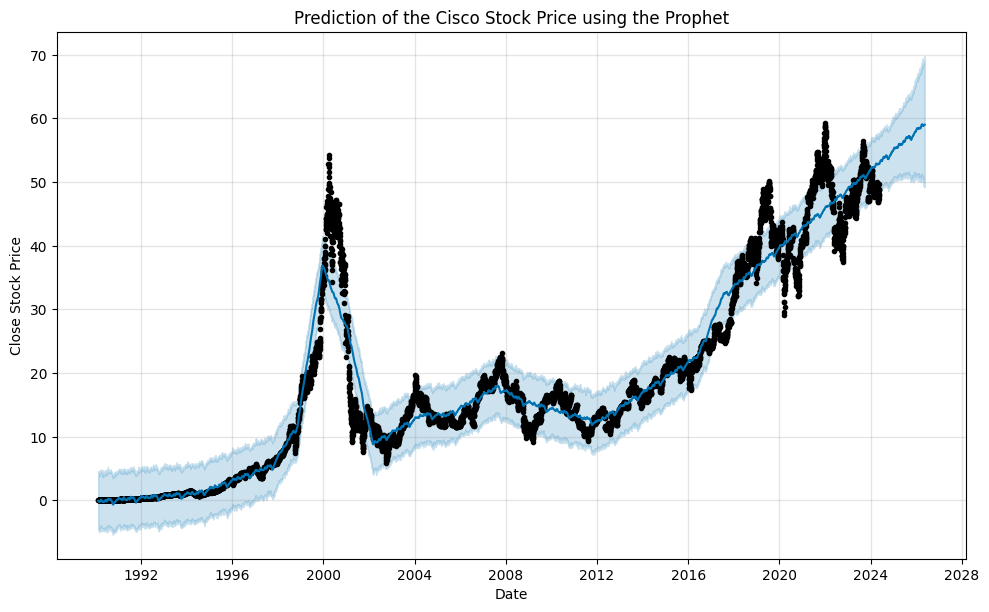

In [20]:
future = m.make_future_dataframe(periods=365*2) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Cisco Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

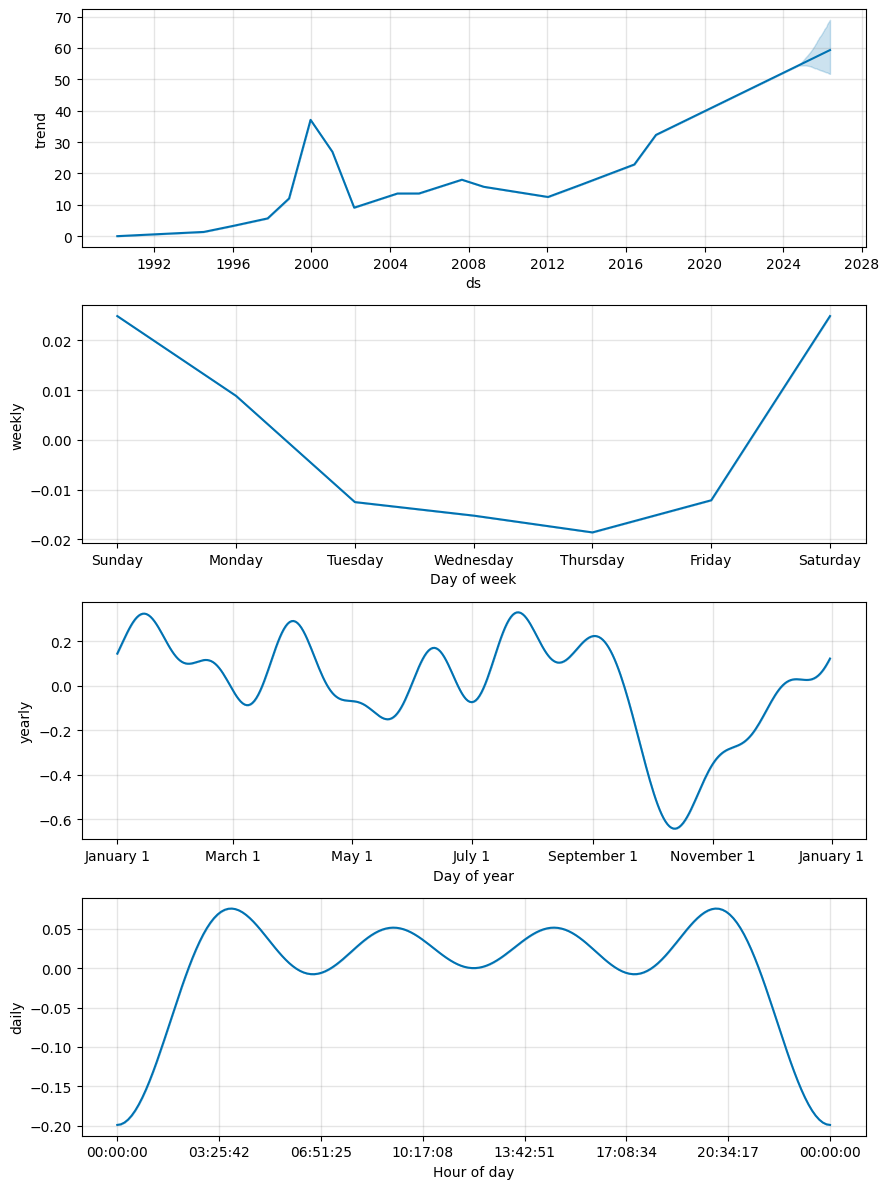

In [21]:
m.plot_components(prediction)
plt.show()

In [22]:
filtered_df = prediction[prediction['ds'] == '2025-12-31']

# Stock price at end of 2025.
print(filtered_df.iloc[0].trend)

58.17803807985765


# S&P Global

In [23]:
gspc = yf.Ticker("SPGI")
data = gspc.history(period="40y")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1984-05-16 00:00:00-04:00,0.0,2.070369,2.050898,2.050898,161600,0.0,0.0
1984-05-17 00:00:00-04:00,0.0,2.070369,2.037918,2.044408,525600,0.0,0.0
1984-05-18 00:00:00-04:00,0.0,2.031428,1.973017,2.011958,271200,0.0,0.0
1984-05-21 00:00:00-04:00,0.0,2.024938,2.005468,2.005468,287200,0.0,0.0
1984-05-22 00:00:00-04:00,0.0,2.063879,1.992487,2.063879,439200,0.0,0.0


In [24]:
data = data.reset_index()[["Date","Close"]]
data.head()

,Date,Close
0,1984-05-16 00:00:00-04:00,2.050898
1,1984-05-17 00:00:00-04:00,2.044408
2,1984-05-18 00:00:00-04:00,2.011958
3,1984-05-21 00:00:00-04:00,2.005468
4,1984-05-22 00:00:00-04:00,2.063879


In [25]:
data["Date"] = data["Date"].dt.date
data.head()

,Date,Close
0,1984-05-16,2.050898
1,1984-05-17,2.044408
2,1984-05-18,2.011958
3,1984-05-21,2.005468
4,1984-05-22,2.063879


In [26]:
data.describe()

,Close
count,10082.000000
mean,72.645711
std,113.967892
min,1.908114
25%,4.786061
50%,22.221571
75%,71.640560
max,469.144928


In [27]:
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head()

,ds,y
0,1984-05-16,2.050898
1,1984-05-17,2.044408
2,1984-05-18,2.011958
3,1984-05-21,2.005468
4,1984-05-22,2.063879


In [28]:
data.describe()

,y
count,10082.000000
mean,72.645711
std,113.967892
min,1.908114
25%,4.786061
50%,22.221571
75%,71.640560
max,469.144928


In [29]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0arsv3vn/6sjxlj03.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0arsv3vn/tjqvdv7i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53227', 'data', 'file=/tmp/tmp0arsv3vn/6sjxlj03.json', 'init=/tmp/tmp0arsv3vn/tjqvdv7i.json', 'output', 'file=/tmp/tmp0arsv3vn/prophet_modelyhzwm5al/prophet_model-20240516150802.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


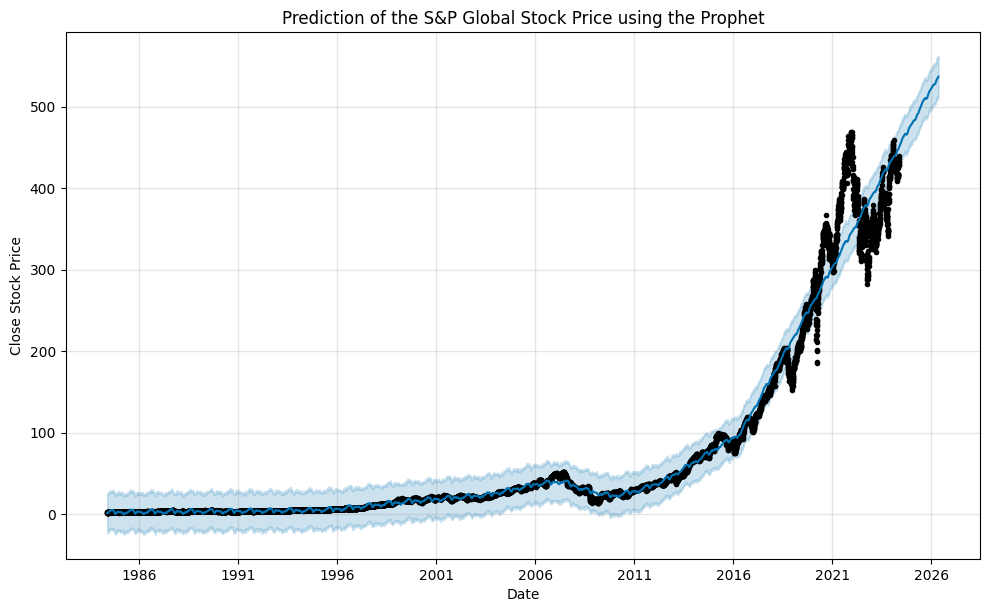

In [30]:
future = m.make_future_dataframe(periods=365*2) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the S&P Global Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

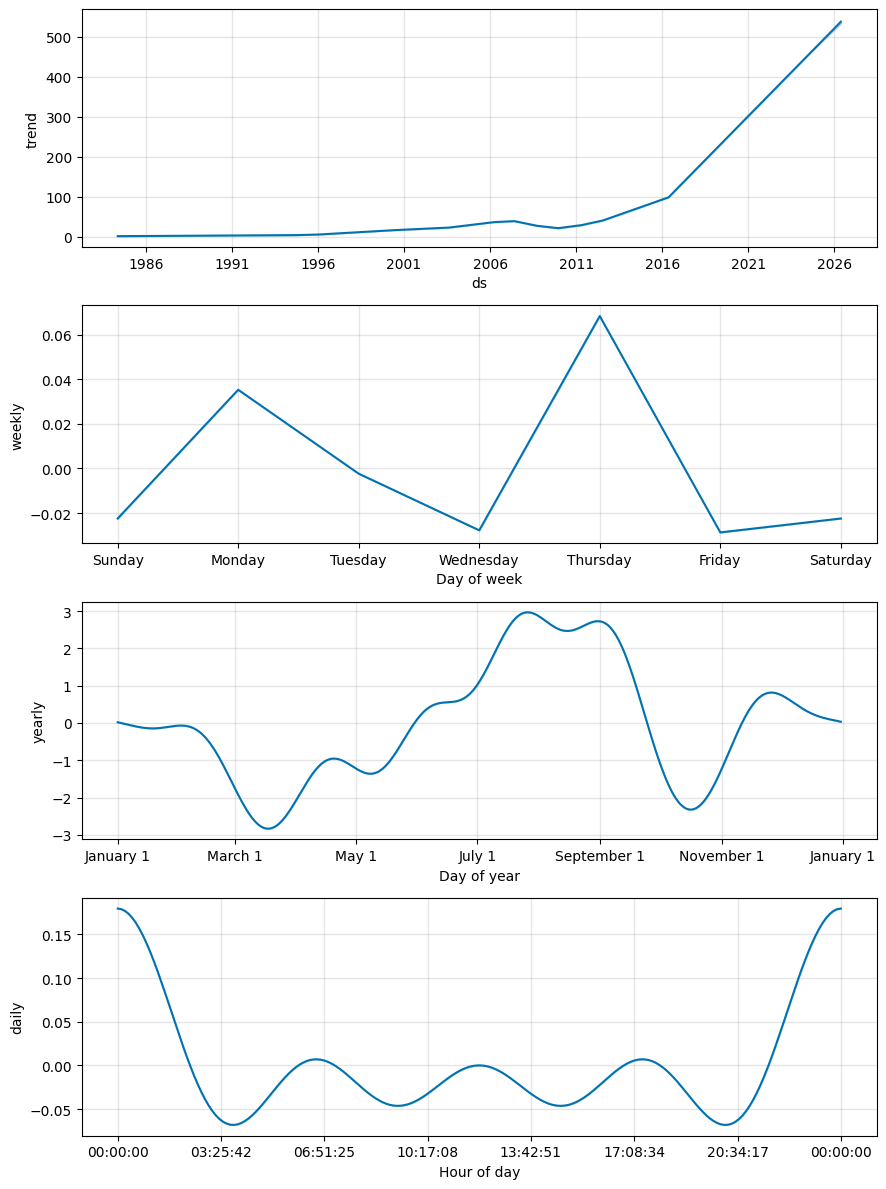

In [31]:
m.plot_components(prediction)
plt.show()

In [32]:
filtered_df = prediction[prediction['ds'] == '2025-12-31']

# Stock price at end of 2025.
print(filtered_df.iloc[0].trend)

521.4075171675237


# BitCoin

In [33]:
gspc = yf.Ticker("BTC-USD")
data = gspc.history(period="40y")
data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-09-17 00:00:00+00:00,465.864014,468.174011,452.421997,457.334015,21056800,0.0,0.0
2014-09-18 00:00:00+00:00,456.859985,456.859985,413.104004,424.440002,34483200,0.0,0.0
2014-09-19 00:00:00+00:00,424.102997,427.834991,384.532013,394.795990,37919700,0.0,0.0
2014-09-20 00:00:00+00:00,394.673004,423.295990,389.882996,408.903992,36863600,0.0,0.0
2014-09-21 00:00:00+00:00,408.084991,412.425995,393.181000,398.821014,26580100,0.0,0.0


In [34]:
data = data.reset_index()[["Date","Close"]]
data.head()

,Date,Close
0,2014-09-17 00:00:00+00:00,457.334015
1,2014-09-18 00:00:00+00:00,424.440002
2,2014-09-19 00:00:00+00:00,394.795990
3,2014-09-20 00:00:00+00:00,408.903992
4,2014-09-21 00:00:00+00:00,398.821014


In [35]:
data["Date"] = data["Date"].dt.date
data.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [36]:
data.describe()

,Close
count,3530.000000
mean,16240.749614
std,18010.192720
min,178.102997
25%,1031.617523
50%,8744.426270
75%,27082.388672
max,73083.500000


In [37]:
data = data.rename(columns = {"Date":"ds","Close":"y"}) #renaming the columns of the dataset
data.head()

,ds,y
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


In [38]:
data.describe()

,y
count,3530.000000
mean,16240.749614
std,18010.192720
min,178.102997
25%,1031.617523
50%,8744.426270
75%,27082.388672
max,73083.500000


In [39]:
from prophet import Prophet
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data) # fit the model using all data

DEBUG:cmdstanpy:input tempfile: /tmp/tmp0arsv3vn/0c9_clfw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp0arsv3vn/3vtqne58.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77744', 'data', 'file=/tmp/tmp0arsv3vn/0c9_clfw.json', 'init=/tmp/tmp0arsv3vn/3vtqne58.json', 'output', 'file=/tmp/tmp0arsv3vn/prophet_modelxiw8zwz5/prophet_model-20240516150811.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
15:08:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
15:08:13 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


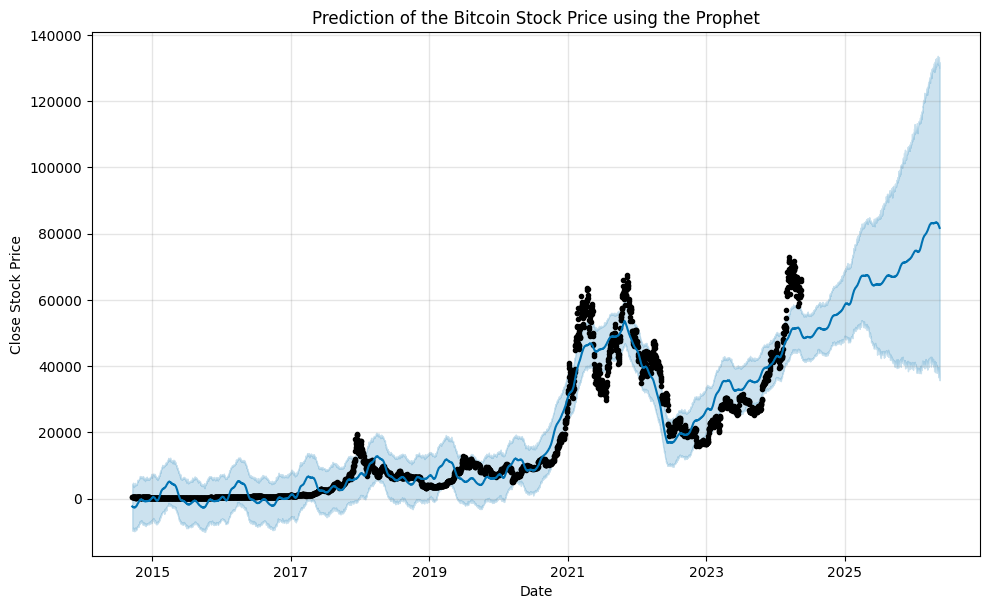

In [40]:
future = m.make_future_dataframe(periods=365*2) #we need to specify the number of days in future
prediction = m.predict(future)
m.plot(prediction)
plt.title("Prediction of the Bitcoin Stock Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()

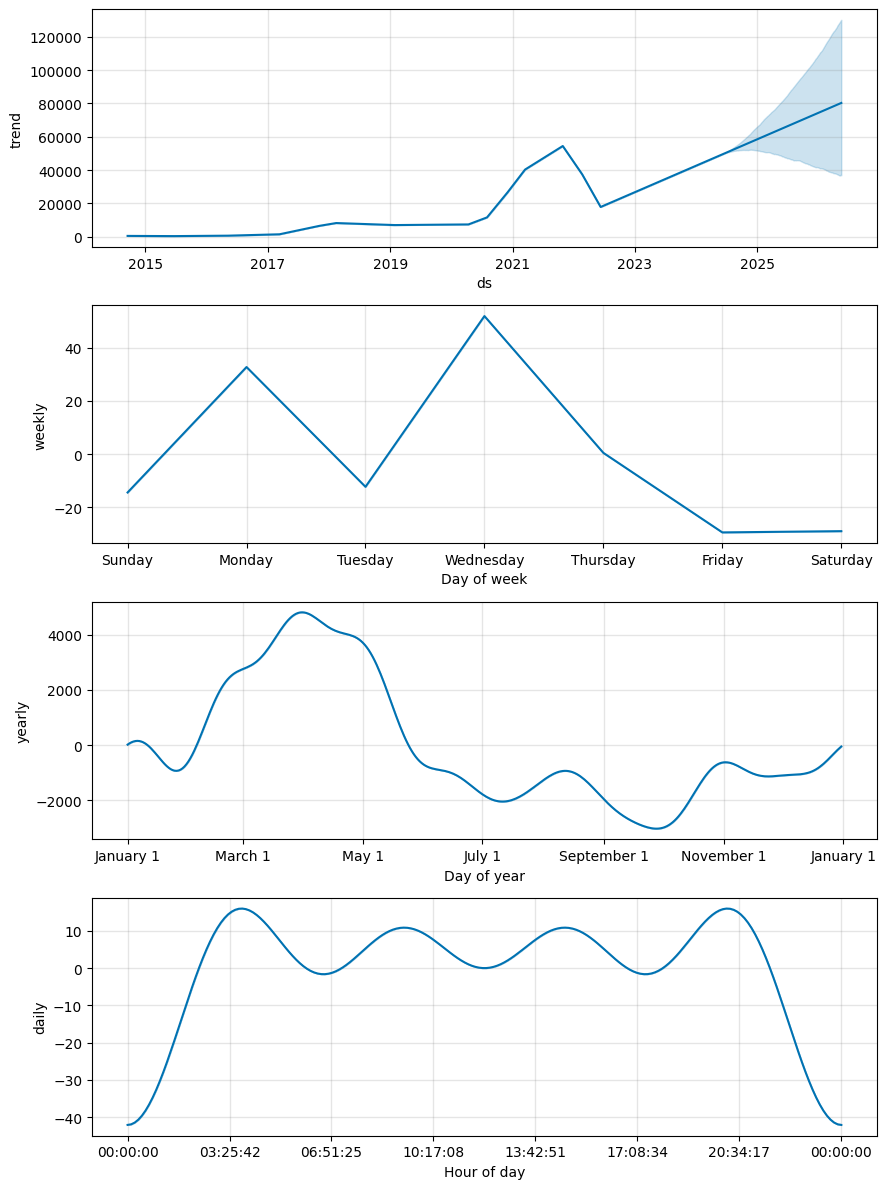

In [41]:
m.plot_components(prediction)
plt.show()

In [42]:
filtered_df = prediction[prediction['ds'] == '2025-12-31']

# Stock price at end of 2025.
print(filtered_df.iloc[0].trend)

74369.5941652875


# Results For End of 2025
| Organization/Currency | Symbol | Price |
| --- | --- | --- |
| Microsoft | MSFT | 433.81960102907556 |
| Cisco | CSCO | 58.29274710319666 |
| S&P Global Inc | SPGI | 521.5941512331191 |
| Bitcoin | BTC-USD | 70565.83956710469 |

# Conclusion
The stock prices of both Microsoft and Cisco will increase at a rapid pace as they approach 2025. However, they both finish below S&P Global Inc and Bitcoin price predictions. At the end of 2025, Microsoft will finish at about \$433.82 per share, and Cisco will finish at \$58.30 per share. Meanwhile, S&P Global Inc will finish at \$521.59 per share, and Bitcoin will finish at \$70565.84.